In [1]:
import pandas as pd
import numpy as np

In [138]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [36]:
df.shape

(4803, 20)

In [9]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [12]:
df["genres"][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [147]:
import json

def new_df(column_name, keys):
    new_array = []
    for i in range(0, df.shape[0]):
        array = []
        a = json.loads(df[column_name].iloc[i])
        for n in a:
            b = n[keys]
            array.append(b)
        new_array.append(array)
    return new_array

def join_values(new_array):
    joined = []
    for i in new_array:
        array = []
        a = ", ".join(i)
        array.append(a)
        joined.append(array)
    return joined
        
def dataframe(joined, new_name):
    x = pd.DataFrame(joined)
    x.columns = [new_name]
    return x

In [141]:
columns = new_df("genres", "name")
d = join_values(columns)
dx = dataframe(d, 'movie_genre')
dx.head()

,movie_genre
0,"Action, Adventure, Fantasy, Science Fiction"
1,"Adventure, Fantasy, Action"
2,"Action, Adventure, Crime"
3,"Action, Crime, Drama, Thriller"
4,"Action, Adventure, Science Fiction"


In [142]:
new_df = pd.concat([df, dx], axis=1)
new_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_genre
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action"


In [146]:
columns = new_df("keywords", "name")
d = join_values(columns)
d_key = dataframe(d, 'category')
d_key

,category
0,"culture clash, future, space war, space colony..."
1,"ocean, drug abuse, exotic island, east india t..."
2,"spy, based on novel, secret agent, sequel, mi6..."
3,"dc comics, crime fighter, terrorist, secret id..."
4,"based on novel, mars, medallion, space travel,..."
...,...
4798,"united states–mexico barrier, legs, arms, pape..."
4799,
4800,"date, love at first sight, narration, investig..."
4801,


In [77]:
key_df = pd.concat([new_df, d_key], axis=1)
key_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_genre,category
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t..."


In [51]:
columns = new_df("production_companies", "name")
d = join_values(columns)
d_prod = dataframe(d, 'prod comp')
d_prod

,prod comp
0,"Ingenious Film Partners, Twentieth Century Fox..."
1,"Walt Disney Pictures, Jerry Bruckheimer Films,..."
2,"Columbia Pictures, Danjaq, B24"
3,"Legendary Pictures, Warner Bros., DC Entertain..."
4,Walt Disney Pictures
...,...
4798,Columbia Pictures
4799,
4800,"Front Street Pictures, Muse Entertainment Ente..."
4801,


In [78]:
df_prod = pd.concat([key_df, d_prod], axis=1)
df_prod.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_genre,category,prod comp
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,..."


In [53]:
columns = new_df("spoken_languages", "name")
d = join_values(columns)
d_lang = dataframe(d, 'languages')
d_lang

,languages
0,"English, Español"
1,English
2,"Français, English, Español, Italiano, Deutsch"
3,English
4,English
...,...
4798,Español
4799,
4800,English
4801,English


In [136]:
df_lang = pd.concat([df_prod, d_lang], axis=1)
df_lang.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_genre,category,prod comp,languages
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","English, Español"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",English


In [58]:
df_lang.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'languages'],
      dtype='object')

In [59]:
df["production_countries"]

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
                              ...                        
4798    [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...
4799                                                   []
4800    [{"iso_3166_1": "US", "name": "United States o...
4801    [{"iso_3166_1": "US", "name": "United States o...
4802    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, Length: 4803, dtype: object

In [ ]:
columns = new_df("production_countries", "name")
d = join_values(columns)
d_count = dataframe(d, 'prod_country')
d_count.head(3)

In [82]:
pd_count = pd.concat([df_lang, d_count], axis=1)
pd_count.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,movie_genre,category,prod comp,languages,prod_country
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","English, Español","United States of America, United Kingdom"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",English,United States of America


In [83]:
final_df = pd_count.drop(["genres", "keywords", "production_companies", "production_countries", "spoken_languages"], axis=1)
final_df.head(2)

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,movie_genre,category,prod comp,languages,prod_country
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","English, Español","United States of America, United Kingdom"
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",English,United States of America


##### Compare movies that have comedy and romance, and those that have contain action, and see compare how they perform.

In [134]:
df_comedy = final_df[final_df['movie_genre'].str.contains("Comedy")]
df_comedy.head(2)

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,movie_genre,category,prod comp,languages,prod_country
18,225000000,http://www.sonypictures.com/movies/meninblack3/,41154,en,Men in Black 3,Agents J (Will Smith) and K (Tommy Lee Jones) ...,52.035179,2012-05-23,624026776,106.0,Released,They are back... in time.,Men in Black 3,6.2,4160,"Action, Comedy, Science Fiction","time travel, time machine, alien, fictional go...","Amblin Entertainment, Media Magik Entertainmen...",English,United States of America
40,200000000,http://www.disney.go.com/cars/,49013,en,Cars 2,Star race car Lightning McQueen and his pal Ma...,49.986590,2011-06-11,559852396,106.0,Released,Ka-ciao!,Cars 2,5.8,2033,"Animation, Family, Adventure, Comedy","car race, sequel, comedy, anthropomorphism, be...","Walt Disney Pictures, Pixar Animation Studios","English, 日本語, Italiano, Français",United States of America


In [133]:
df_romcom = df_comedy[df_comedy["movie_genre"].str.contains("Romance")]
df_romcom.head(3)

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,movie_genre,category,prod comp,languages,prod_country
226,120000000,http://www.howdoyouknow-movie.com/,42888,en,How Do You Know,After being cut from the USA softball team and...,11.137655,2010-12-17,48668907,121.0,Released,How do you know it's love?,How Do You Know,4.9,223,"Comedy, Drama, Romance","love triangle, baseball, athlete, aftercredits...","Columbia Pictures, Gracie Films, Road Rebel",English,United States of America
272,90000000,NaN,24113,en,Town & Country,Porter Stoddard is a well-known New York archi...,1.004579,2001-04-27,10372291,104.0,Released,There's no such thing as a small affair.,Town & Country,3.7,16,"Comedy, Romance","architect, cellist, friends, anniversary",New Line Cinema,English,
284,100000000,http://www.littlefockers.net/,39451,en,Little Fockers,"It has taken 10 years, two little Fockers with...",32.389353,2010-12-21,310650585,98.0,Released,"Kids bring everyone closer, right?",Little Fockers,5.4,1060,"Comedy, Romance","nurse, cat, father-in-law, vomit, kids and fam...","Paramount Pictures, Universal Pictures, Everym...",English,United States of America


In [127]:
df_romcom.groupby("original_title")["revenue"].sum().sort_values(ascending=False)

original_title
Forrest Gump                              677945399
Mamma Mia!                                609841637
Meet the Fockers                          516642939
Aladdin                                   504050219
Pretty Woman                              463000000
                                            ...    
Don Jon                                           0
Rocket Singh: Salesman of the Year                0
Divine Secrets of the Ya-Ya Sisterhood            0
Saving Face                                       0
非常幸运                                              0
Name: revenue, Length: 484, dtype: int64

<AxesSubplot:title={'center':'movies containing romance and comedy'}, ylabel='original_title'>

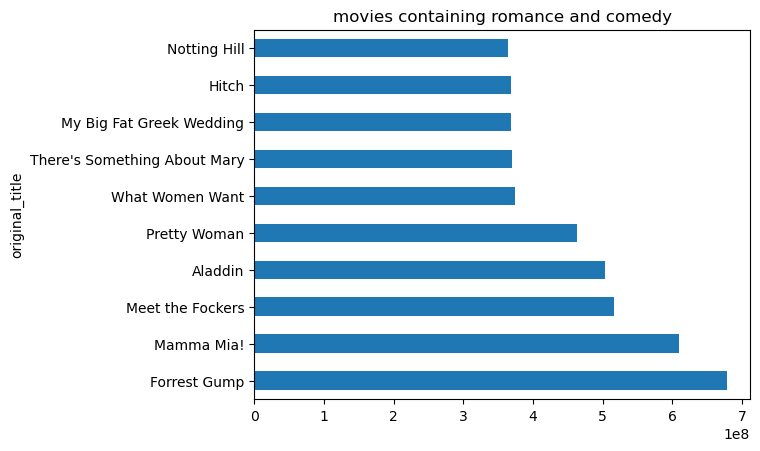

In [132]:
df_romcom.groupby("original_title")["revenue"].sum().sort_values(ascending=False).head(10).plot(kind="barh", title="movies containing romance and comedy")

In [123]:
movie_df = final_df[final_df["movie_genre"].str.contains("Action")]
movie_df.head()

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,movie_genre,category,prod comp,languages,prod_country
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","Ingenious Film Partners, Twentieth Century Fox...","English, Español","United States of America, United Kingdom"
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Walt Disney Pictures, Jerry Bruckheimer Films,...",English,United States of America
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...","Columbia Pictures, Danjaq, B24","Français, English, Español, Italiano, Deutsch","United Kingdom, United States of America"
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id...","Legendary Pictures, Warner Bros., DC Entertain...",English,United States of America
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...",Walt Disney Pictures,English,United States of America


In [124]:
movie_df.groupby("original_title")["revenue"].sum().sort_values(ascending=False)

original_title
Avatar                         2787965087
The Avengers                   1519557910
Jurassic World                 1513528810
Furious 7                      1506249360
Avengers: Age of Ultron        1405403694
                                  ...    
Jimmy and Judy                          0
Jerusalema                              0
Jack Brooks: Monster Slayer             0
Ironclad                                0
Heroes of Dirt                          0
Name: revenue, Length: 1154, dtype: int64

<AxesSubplot:title={'center':'movies containing action'}, ylabel='original_title'>

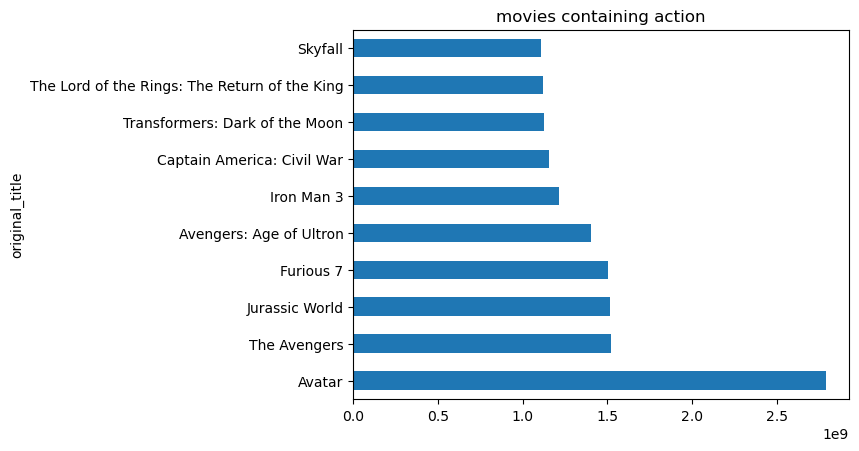

In [131]:
movie_df.groupby("original_title")["revenue"].sum().sort_values(ascending=False).head(10).plot(kind="barh", title="movies containing action")